In [16]:
import sys
sys.path.append("../")
import torch
from CFIL_for_NIP.memory import ApproachMemory

In [17]:
memory_size=5e4
device = "cuda" if torch.cuda.is_available() else "cpu"  
approach_memory = ApproachMemory(memory_size, device)

In [18]:
joblib_path = "../CFIL_for_NIP/train_data/20250127_almi/approach_memory_f_mask.joblib"
approach_memory.load_joblib(joblib_path)

In [19]:
batch_size = 32
sample = approach_memory.sample(batch_size)
imgs = sample['images_seq']
positions_eb = sample['positions_seq']

In [20]:
imgs.shape

torch.Size([32, 3, 256, 256])

In [21]:
img = imgs[0].cpu().numpy().transpose(1,2,0)
img.shape

(256, 256, 3)

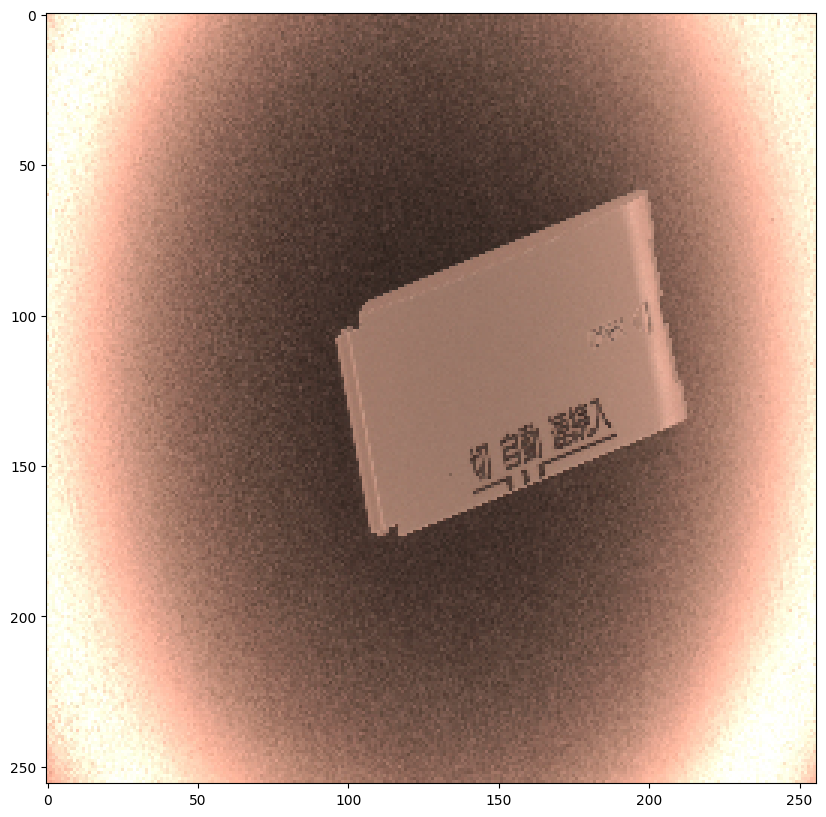

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.axis('on')
plt.show()  
